In [1]:
import numpy as np
subst_mat = np.array([
        [0,5,2,5],
        [5,0,5,2],
        [2,5,0,5],
        [5,2,5,0]
    ])

In [2]:
import sys
def C(i,j,a):
    if T[i, j] == None:        
        dict_subst = {"A":0, "C": 1, "G":2, "T":3}
        v1,v2,v3,v4 = sys.maxsize,sys.maxsize,sys.maxsize,sys.maxsize
        if i>0 and j>0 : 
            v1 = C(i-1,j-1,a)+subst_mat[dict_subst[seq1[i-1]], dict_subst[seq2[j-1]]]
        if i>0 and j>=0 : 
            v2 = C(i-1,j,a)+a
        if i>=0 and j>0 : 
            v3 = C(i, j-1,a)+a
        if i==0 and j==0 : 
            v4 = 0
        T[i,j] = min(v1,v2,v3,v4)
    return T[i,j] 

In [46]:
def RecurBackTrack(i,j, seq1, seq2, gap_cost, T, align1="", align2=""):
    dict_subst = {"A":0, "C": 1, "G":2, "T":3}
    if i>0 and j>0 and T[i,j]==T[i-1,j-1]+ subst_mat[dict_subst[seq1[i-1]], dict_subst[seq2[j-1]]] :
        align1 = seq1[i-1] + align1
        align2 = seq2[j-1] + align2
        RecurBackTrack(i-1,j-1,seq1, seq2, gap_cost, T, align1, align2)
    elif i>0 and j>=0 and T[i,j]==T[i-1,j]+ gap_cost :
        align1 = seq1[i-1] + align1
        align2 = "_" + align2
        RecurBackTrack(i-1,j,seq1, seq2, gap_cost, T, align1, align2)
    elif i>=0 and j>0 and T[i,j]==T[i,j-1]+gap_cost :
        align1 = "_" + align1
        align2 = seq2[j-1] + align2
        RecurBackTrack(i,j-1, seq1, seq2, gap_cost, T, align1, align2)
    else:
        print(align1, align2)
        return None

In [5]:
import Bio

In [6]:
from Bio import SeqIO
import numpy as np

def read_FASTA(filename):
    records_dict = {}
    for seq_record in SeqIO.parse(filename, "fasta"):
        records_dict[seq_record.id] = seq_record.seq        
    return records_dict

In [48]:
# Case 4
seq1 = list(read_FASTA("C:/Users/lenab/Documents/AU/Algorithms_in_bioinformatics/Week_1/seq1.fasta").values())[0]
seq2 = list(read_FASTA("C:/Users/lenab/Documents/AU/Algorithms_in_bioinformatics/Week_1/seq2.fasta").values())[0]
m = len(seq1)
n = len(seq2)

T = np.full([m+1,n+1], None)

print(C(m,n,5))
print(RecurBackTrack(m,n, seq1, seq2, 5, T))



325
GGCCTAAAGGCGCCGGTCTTTCGTACCCCAAAATCTCG_GCATTTTAAGATAA_GTGAGTGTTGCGTTACACTAGCGATCTACCGCGTCTTATACT_TAAGCG_TATGCCC_AGATCTGA_CTAATCGTGCCCCCGGATTAGACGGGCTTGATGGGAAAGAACA__G_CTC_G__TCTGTTTACGTATAAACAGAATCGCCTGGGTTCGC GGGCTAAAGGTTAGGGTCTTTCACACTAAAGAGTGGTGCGTATCGT_GGCTAATGT_ACCGCTTC_TGGTATC_GTGGCTTA_CG_GCCAGAC_CTACAAGTACTAGACCTGAGAACTAATCTTGTCGAGCCTTC_CATT_GA_GGG__TAATGGGAGAGAACATCGAGTCAGAAGTTATTCTTGTTTACGTAGAATCGCCTGGGTCCGC
None


In [49]:
#Case 1

seq1 = "ACGTGTCAACGT"
seq2 = "ACGTCGTAGCTA"

m = len(seq1)
n = len(seq2)

T = np.full([m+1,n+1], None)

print(C(m,n,5))
print(RecurBackTrack(m,n, seq1, seq2, 5, T))

22
ACGT_GTCAACGT ACGTCGT_AGCTA
None


In [51]:
# Case 2
seq1 = "AATAAT"
seq2= "AAGG"
m = len(seq1)
n = len(seq2)

T = np.full([m+1,n+1], None)

print(C(m,n,5))
print(RecurBackTrack(m,n, seq1, seq2, 5, T))

14
AATAAT AA_GG_
None


In [50]:
# Case 3
seq1 = "TCCAGAGA"
seq2= "TCGAT" 
m = len(seq1)
n = len(seq2)

T = np.full([m+1,n+1], None)

print(C(m,n,5))
print(RecurBackTrack(m,n, seq1, seq2, 5, T))

20
TCCAGAGA T_C_GA_T
None


Test of the running time

In [23]:
import random

In [24]:
DNA = 'ACGT'
LINE_WIDTH = 60


def simulate_string(m):
    """Simulate a DNA sequence of length m."""
    nucleotides = [random.choice(DNA) for _ in range(m)]
    lines = []
    for i in range(0, m, LINE_WIDTH):
        lines.append(''.join(nucleotides[i:(i+LINE_WIDTH)]))
    return '\n'.join(lines)

In [25]:
simulate_string(10)

'TTCGTTCGCA'

In [30]:
import os
import time

Ns = [10,50,100,200,300,400,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000]
of = open("eval_times_st_construct.txt", "w")
construction_times= {}
Ns = [10,20,30]

for n in Ns : 
    for i in range(10) : 
            seq1 = simulate_string(n)
            seq2 = simulate_string(n)
            T = np.full([n+1,n+1], None)
            start_time = time.time()
            C(n,n,5)
            st_const_time = time.time() - start_time
            print(st_const_time)
            thisline = str(n*n) + " : " + str(st_const_time) + "\n"
            of.write(thisline)
            if (n*n) in construction_times:
                construction_times[(n*n)] += [st_const_time]
            else:
                construction_times[(n*n)] = [st_const_time]


construction_mean_times = {k: np.mean(construction_times[k]) for k in construction_times}            

0.0009970664978027344
0.000997304916381836
0.000997781753540039
0.0009982585906982422
0.0009975433349609375
0.0009965896606445312
0.0009975433349609375
0.0
0.000997781753540039
0.0010039806365966797
0.0019948482513427734
0.001993894577026367
0.0019943714141845703
0.0029926300048828125
0.003022432327270508
0.001966238021850586
0.0019960403442382812
0.0019788742065429688
0.0019936561584472656
0.0029594898223876953
0.006010770797729492
0.0049610137939453125
0.00500178337097168
0.005013704299926758
0.005957126617431641
0.004956960678100586
0.006019115447998047
0.004950046539306641
0.004982709884643555
0.005019426345825195


In [35]:
xs = list(construction_mean_times.keys())
ys = []
for i in range(len(xs)) : 
    ys.append(construction_mean_times[xs[i]]/xs[i])
print(xs,ys)

[100, 400, 900] [8.983850479125976e-06, 5.723118782043456e-06, 5.874739752875434e-06]


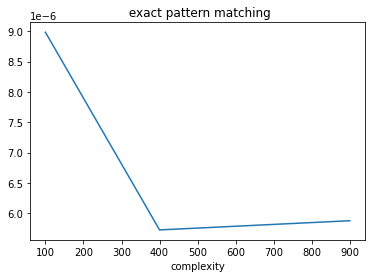

In [38]:
import matplotlib.pyplot as plt

plt.plot(xs, ys)
plt.xlabel("complexity")
plt.ylabel("")
plt.title(" exact pattern matching")
plt.show()